# Project 3 Voting Paper
### DS 3001: Foundations of Machine Learning
### Gabe Silverstein, Rohan Chowla, Evan Stewart, and Rithwik Raman

## Summary

>  This research project aimed to develop a predictive model for the 2024 presidential election in Virginia. To develop this model, the group first posed its research question: how can we utilize prior voting data and demographic information to construct a reliable model that forecasts plausible results for the 2024 presidential election in Virginia? We then scanned the multiple IPUMS NHGIS county datasets which included a diverse range of population statistics such as age, sex, race, and income. From these datasets, we narrowed down factors we thought could be important and focused on the most recent 2020 census data to be used for model training. That 2020 data was then combined with prior demographic information going back to the year 2000 in an effort to extrapolate possible values for 2024. With the research question formulated and the datasets determined, the methodology needed to address this question was developed. The group initially wanted to classify each county as a win or loss for the Democratic Party but found trouble with this approach. Therefore, we settled on a regression task that would predict the net votes (Democrat minus Republican) for each county. A random forest algorithm was selected to build the predictive model due to its interpretability, robustness, and overall accuracy. Cross-validation was used to determine the hyperparameters for the model. When evaluating predictors after fitting the model, the five factors with the largest mean decrease in impurity were Rural, Foreigners, Never Married, Black or African American, and AAPI. This evaluation was performed on cleaned data that had been imputed and scaled. Summing the predicted vote differentials across the counties resulted in a tight race with the Republican candidate winning Virginia by about sixty-five thousand votes. Since the 2024 election hasn’t occurred, there were very little metrics the group could use to verify the accuracy of the prediction. However, when comparing the predicted county results to the 2020 electoral map of Virginia, we concluded that the results were similar enough to have been a plausible outcome. For instance, in both maps, most of the rural counties are carried by the Republican candidate, while there is a high concentration of Democratic votes in Northern Virginia. Through incorporating a comprehensive set of demographic and voting data with cross-validated hyperparameters, the random forest demonstrated good efficacy in predicting plausible election results. Although the group faced challenges in developing the model, we were able to create a pretty successful strategy to answer our research question.




## Data Analysis

> For this data analysis, the group pulled variables from the National Historical Geographic Information System (NHGIS) which has been collecting census data from 1790 up until the present. In particular, we honed in on the 2020 data from the provided time series file. This data was combined with census information from the past 20 years in order to extrapolate for 2024 values. Where possible, data older than 2000 was not used since the group felt it wouldn’t accurately portray the current Virginia county landscapes. We also downloaded our own dataset from IPUMS NHGIS that had additional demographic information. The tables and variables selected from the datasets include:

>     Table A57: Persons by Urban/Rural Status
      - A57AD2000:   2000: Persons: Rural
      - A57AD2010:   2010: Persons: Rural
>
>     Table B57: Persons by Age
      - B57AP2000:   2000: Persons: 65 to 74 years
      - B57AP2010:   2010: Persons: 65 to 74 years
      - B57AQ2000:   2000: Persons: 75 to 84 years
      - B57AQ2010:   2010: Persons: 75 to 84 years
      - B57AR2000:   2000: Persons: 85 years and over
      - B57AR2010:   2010: Persons: 85 years and over
>
>     Table B18: Persons by Race
      - B18AB2000:   2000: Persons: Black or African American (single race)
      - B18AB2010:   2010: Persons: Black or African American (single race)
      - B18AB2020:   2020: Persons: Black or African American (single race)
      - B18AD2000:   2000: Persons: Asian and Pacific Islander and Other Race (single race)
      - B18AD2010:   2010: Persons: Asian and Pacific Islander and Other Race (single race)
      - B18AD2020:   2020: Persons: Asian and Pacific Islander and Other Race (single race)
>
>     Table A35: Persons of Hispanic or Latino Origin
      - A35AA2000:   2000: Persons: Hispanic or Latino
      - A35AA2010:   2010: Persons: Hispanic or Latino
      - A35AA2020:   2020: Persons: Hispanic or Latino
>
>     Table BL1: Persons of Marrying Age by Sex by Marital Status
      - BL1AA1990:   1990: Persons: Male ~ Never married
      - BL1AA2000:   2000: Persons: Male ~ Never married
      - BL1AG1990:   1990: Persons: Female ~ Never married
      - BL1AG2000:   2000: Persons: Female ~ Never married
>
>     Table AV1: Persons by Sex
      - AV1AB2000:   2000: Persons: Female
      - AV1AB125:    2008-2012: Persons: Female
      - AV1AB195:    2015-2019: Persons: Female
>
>     Table AT5: Persons by Nativity:
      - AT5AB2000:   2000: Persons: Foreign born
      - AT5AB125:    2008-2012: Persons: Foreign born
      - AT5AB195:    2015-2019: Persons: Foreign born
>
>     Table B69: Persons 25 Years and Over by Educational Attainment
      - B69AC2000:   2000: Persons: 25 years and over ~ 4 or more years of college (until 1980) or bachelor's degree or higher (since 1990)
      - B69AC125:    2008-2012: Persons: 25 years and over ~ 4 or more years of college (until 1980) or bachelor's degree or higher (since 1990)
      - B69AC195:    2015-2019: Persons: 25 years and over ~ 4 or more years of college (until 1980) or bachelor's degree or higher (since 1990)
>
>     Table B84: Persons 16 Years and Over by Labor Force and Employment Status
      - B84AA2000:   2000: Persons: 16 years and over ~ In labor force
      - B84AA125:    2008-2012: Persons: 16 years and over ~ In labor force
      - B84AA195:    2015-2019: Persons: 16 years and over ~ In labor force
>
>     Table BD5: Per Capita Income in Previous Year
      - BD5AA2000:   2000: Per capita income in previous year
      - BD5AA125:    2008-2012: Per capita income in previous year
      - BD5AA195:    2015-2019: Per capita income in previous year
>
>     Table CL6: Persons below Poverty Level in Previous Year
      - CL6AA2000:   2000: Persons: Poverty status is determined ~ Income below poverty level
      - CL6AA125:    2008-2012: Persons: Poverty status is determined ~ Income below poverty level
      - CL6AA195:    2015-2019: Persons: Poverty status is determined ~ Income below poverty level
>
>     voting_VA.csv: party and candidatevotes

> All of these tables were summarized into 14 variables. The demographic variables came from the NHGIS time series and the vote differentials and probability of voting Democrat came from `voting_VA.csv`:

> ```
College Degree
Labor Force
Foreigners
Females
Income
Poverty
Rural
Black or African American
Latinx
AAPI
Never Married
65+
Prob Dem
Vote Diff

> Data cleaning and preparation for this research project was particularly difficult at times. For instance, the shapefile data used to render the maps of Virginia were extremely large and could not be uploaded to GitHub through normal means. The group tinkered with GitHub Large File Storage, but it didn’t allow us to push to public forks. Instead, we decided to upload zip files and extract the data within the notebook, using the Zipfile python package. This roundabout solution took some time to come up with.

> Not only was rendering the maps a challenge, but so was selecting the data to use. There were many possible variables for us to choose from. The group did our best to summarize factors we thought could influence election results. We also had to come up with an idea on how to create our train and test data. Because we wanted to include all counties within our model, it would be difficult to do a train-test split. There also wasn’t any 2024 census data from IPUMS NHGIS. Therefore, we had to use extrapolated mock data to predict on. If we had just used the 2020 data, the model wouldn’t really be predicting the results of the 2024 presidential election in Virginia.

> In addition to the obstacles the group faced in our data preparation methodology, we also had to overcome some data-cleaning challenges. Even though the data was mostly tidy, there were some missing values that we had to impute in both the train and test datasets. The missings in the 2020 census data used for training can in some cases be attributed to no respondents meeting that description and were described by the NHGIS data dictionaries. The missings in the 2024 test data can be characterized by issues extrapolating from missing 2000-2020 data. For all null and missing values across the variables, they were imputed using the median of their respective variable category. This process resulted in zero null values in all variables. This imputation was done to further omit the effect of outliers in the dataset while still preserving the sample size of the data and reducing bias. If the null values were just dropped, we could have lost a lot of valuable data that would have affected our correlation matrix, visualizations, and predictive model.

> Even though the group replaced the null values, we still faced challenges in preparing the data for analysis. When trying to append the probability that a county would vote Democrat to our demographic data, we found that the `voting_VA.csv` file and the census data didn’t have the same list of counties. We had to remove the excess counties from the voting data and sort both data frames alphabetically so that the probabilities lined up correctly with the rest of the data. County names were also integer encoded for the model. Datasets were feature-scaled using a min-max scaler in order to preserve model integrity. All of the aforementioned cleaning can be found in the `voting_cleaning.ipynb` file listed in the group's GitHub repository and within this Data Analysis section.


In [ ]:
import numpy as np
import pandas as pd
import geopandas as gpd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.ensemble import RandomForestRegressor
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import GridSearchCV
from sklearn.tree import plot_tree
from mpl_toolkits.axes_grid1 import make_axes_locatable
from zipfile import ZipFile
from matplotlib import colormaps, cm
from matplotlib.colors import ListedColormap, LinearSegmentedColormap, TwoSlopeNorm
from IPython.display import SVG, display

! git clone https://github.com/gsilver321/project_voting

Cloning into 'project_voting'...
remote: Enumerating objects: 201, done.
remote: Counting objects: 100% (76/76), done.
remote: Compressing objects: 100% (39/39), done.
remote: Total 201 (delta 52), reused 48 (delta 37), pack-reused 125
Receiving objects: 100% (201/201), 124.90 MiB | 25.85 MiB/s, done.
Resolving deltas: 100% (97/97), done.
Updating files: 100% (66/66), done.


In [ ]:
# Extract large shp files
with ZipFile('project_voting/va_bounds/VirginiaCounty_ClippedToShoreline.zip') as f:
  f.extractall(path='project_voting/va_bounds')

with ZipFile('project_voting/va_bounds/VirginiaTown_ClippedToShoreline.zip') as f:
  f.extractall(path='project_voting/va_bounds')

In [ ]:
# Load data
gdf = gpd.read_file('project_voting/va_bounds/VirginiaCounty_ClippedToShoreline.shx') # Load Virginia shapefile for maps
cdf = pd.read_csv('project_voting/data/county_adjacencies.csv') # Load county adjacency data and population data

ddf = pd.read_csv('project_voting/data/demographic_info.csv') # data cleaning can be found at voting_cleaning.ipynb in GitHub
df_train = pd.read_csv('project_voting/data/df_train.csv')
df_test = pd.read_csv('project_voting/data/df_test.csv')

# Merge shapefile data and county adjacency data:
gdf['FIPS_left'] = pd.to_numeric(gdf['STCOFIPS'])
df = gdf.merge(cdf, left_on='FIPS_left', right_on='FIPS')  # merge county population and adjacency data into df
del gdf, cdf

In [ ]:
# scale data before feature running model
scaler = MinMaxScaler(feature_range=(0,1))
ddf_scale = ddf.drop("COUNTY", axis=1)
ddf_scale = pd.DataFrame(scaler.fit_transform(ddf_scale), columns=ddf_scale.columns)

df_test_scale = df_test.drop("COUNTY", axis=1)
df_test_scale = pd.DataFrame(scaler.fit_transform(df_test_scale), columns=df_test_scale.columns)

In [ ]:
cor_df = ddf_scale.copy()
cor_df['Vote Diff'] = np.arcsinh(df_train['vote_diff'])
cor_df.corr(method='kendall') # look for any relationships between variables. Use kendall coefficient to check for nonlinear relationship

,College Degree,Labor Force,Foreigners,Females,Income,Poverty,Rural,Black or African American,Latinx,AAPI,Never Married,65+,Prob Dem,Vote Diff
College Degree,1.000000,0.829346,0.756209,0.801777,0.429532,0.562315,0.197306,0.455281,0.724476,0.742024,0.708817,0.662110,0.068529,0.079973
Labor Force,0.829346,1.000000,0.714514,0.936432,0.311724,0.667350,0.270476,0.493563,0.719690,0.707840,0.802005,0.742538,0.040755,0.017316
Foreigners,0.756209,0.714514,1.000000,0.688312,0.355247,0.529050,0.083409,0.500855,0.858478,0.875570,0.675097,0.566416,0.048000,0.208020
Females,0.801777,0.936432,0.688312,1.000000,0.268657,0.713602,0.295326,0.491512,0.691203,0.680036,0.828207,0.788790,0.044378,-0.002051
Income,0.429532,0.311724,0.355247,0.268657,1.000000,0.034864,0.050512,0.159754,0.335499,0.353960,0.168395,0.181839,0.048006,0.126467
Poverty,0.562315,0.667350,0.529050,0.713602,0.034864,1.000000,0.226758,0.471232,0.539426,0.530310,0.766006,0.738437,0.002717,0.037822
Rural,0.197306,0.270476,0.083409,0.295326,0.050512,0.226758,1.000000,0.025658,0.082738,0.053509,0.216404,0.321327,0.029420,-0.445348
Black or African American,0.455281,0.493563,0.500855,0.491512,0.159754,0.471232,0.025658,1.000000,0.527863,0.526952,0.547112,0.447078,-0.043477,0.293722
Latinx,0.724476,0.719690,0.858478,0.691203,0.335499,0.539426,0.082738,0.527863,1.000000,0.907910,0.670237,0.558569,0.044086,0.200547
AAPI,0.742024,0.707840,0.875570,0.680036,0.353960,0.530310,0.053509,0.526952,0.907910,1.000000,0.672972,0.544895,0.049521,0.225843


**Figure 1:** Correlation Matrix Between Variables of Interest

In [ ]:
ddf_scale["county_encode"] = range(1, 134) # integer encode counties for model
df_test_scale["county_encode"] = range(1, 134)

## Results

> The first step in approaching this prediction problem was determining the type of question we were answering. For instance, would it be easier to classify party winners in each county or predict the number of votes each party received in each county? Initially, the group thought a classification task would be easier since a party candidate either wins a county or they don’t. Therefore, we tried to construct a neural network that would predict the probability of each county being won by the Democrat candidate. Although this approach seemed intuitive, we ran into issues building the layers and getting plausible predictions. To combat this issue, the question was rephrased into a regression task where the model would predict the net votes (Democrat minus Republican) in each county. This approach worked better with the neural network and still allowed for a classification element. Positive net votes would indicate a Democrat win while negative net votes would be a Republican win.

> Despite the improved target variable, the neural network was very complicated to tune, due to the widerange of architectural and hyperparemetric choices. Instead of spending a lot of time trying to marginally improve this model, the group switched to a random forest. Random forests have great interpretability, aren’t dependent on linear relationships, and essentially do their own feature selection through bagging and selecting a random subset of features at each split. They are also less prone to overfitting and can work with smaller datasets that might not get optimal results in a neural network. All of these characteristics were important in the final model selection. As seen in the correlation matrix (Figure 1), there are some variables that could have more complex non-linear relationships, and a random forest can do a good job of discovering those connections.

> With the model determined, the next step was to figure out what we were going to train the model on to make our predictions. As described in the Data Analysis section, the group decided to train on the most recent 2020 census data since the 2024 presidential election is shaping up to be a rematch of the 2020 election. We also did an arcsine transformation of the net votes to make it easier for the random forest to fit the realized range of values. This transformation stabalizes the variance across value ranges, improves distrubitional properties, and improves model interpretability. Grid search was used to cross-validate the random forest hyperparameters before training on the scaled target variable. Grid search explored the predefined hyperparameters we selected and identifies the optimal configuration to maximize our model's efficacy. Root mean squared error was used as the evaluation criteria since we wanted to limit the difference between vote differentials predicted by the model and the actual values. The parameters determined were a max depth of nine and max features of seven.

> After fitting the model on the 2020 census data (Figure 2), the five most important variables with highest Mean Decreases in Impurity determined by the random forest model were Rural, Foreigners, Never Married, Black or African American, and AAPI (Figure 3). This model then predicted the results of the 2024 presidential election using extrapolated census data for 2024. Determining what data to predict on was one of the largest challenges of our methodology.  Since we don’t have access to 2024 data or any way to validate election results that haven’t happened yet, we had to take the prediction results as is. The group didn’t see a feasible way to construct a confusion matrix to determine the accuracy of the 2024 predictions. However, we did use boxplots (Figures 4, 6, 8, 10, 12) and kernel density plots (Figures 5, 7, 9, 11, 13) to compare the 2020 data to the extrapolated/predicted 2024 census data. The group felt that the visualizations demonstrated data that could be possible in 2024, due to its similarity to previous elections and reasonable error bounds.

> Although we cannot yet validate these predictions, the group is fairly confident in our predictions of which county will support which party. The variability of elections makes it hard to forecast results. Factors such as evolving voter sentiments, national political issues, and unforseen campaign dynamics are examples of such variability. The similar 2020 and 2024 matchups, and relatively similar political landscape make our results more believable. When comparing the 2020 electoral map (Figure 14) to the map created using the predicted vote differentials (Figure 15), the results are clearly plausible. Counties in Northern Virginia that always vote Democrat stayed blue, and rural counties that are expected to vote Republican stayed red. Even though there were some swing counties, the results don’t seem like anything that is too out of the ordinary (Figure 16). Summing the vote differentials across the counties resulted in the Republican candidate winning 85 counties and Virginia as a whole by about sixty-five thousand votes (Figure 17). The only things that diminish our confidence in our results are our scaled vote differentials and extrapolated 2024 data. When changing the scaling of the target vote differentials the model was being fit on, we found that the projected winner actually changed. The Democrat candidate was projected to win when the model was trained on the raw vote differentials while the Republican candidate was projected to win when the model was trained on the arcsine-transformed vote differentials. The group stuck with the arcsine-transformed vote differentials because we thought it would be easier for the model to see the true range of values. Despite these challenges, we are confident that the results are reasonable. The group didn’t see a great way to get around extrapolating data or not scaling the target variable. We did our best to get plausible results for the 2024 election given the provided data.


In [ ]:
forest_params = [{'max_depth': range(1, 11), 'max_features': range(5, 14)}]

clf = GridSearchCV(RandomForestRegressor(random_state=0), forest_params, cv=5, scoring='neg_root_mean_squared_error')
clf.fit(ddf_scale, np.arcsinh(df_train["vote_diff"]))
clf.best_params_

{'max_depth': 9, 'max_features': 7}

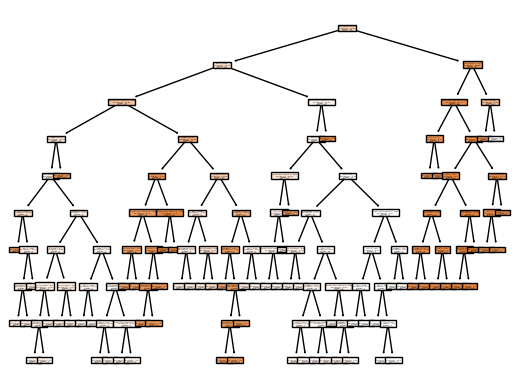

In [ ]:
# Fit random forest:
rf = RandomForestRegressor(max_depth=9, max_features=7, random_state=0)
rf = rf.fit(ddf_scale, np.arcsinh(df_train["vote_diff"]))

plot_tree(rf.estimators_[0], filled=True, feature_names=rf.feature_names_in_)

# Make predictions:
pred_scale = rf.predict(df_test_scale)
pred = np.sinh(pred_scale) # rescale votes

**Figure 2:** Random Forest Model

In [ ]:
df = df.sort_values("NAMELSAD") # sort df alphabetically before appending probabilities
df["Vote Differential"] = pred
df["Scaled Vote Differential"] = pred_scale
df["winner"] = df["Vote Differential"].apply(lambda x: 1 if x > 0 else 0)

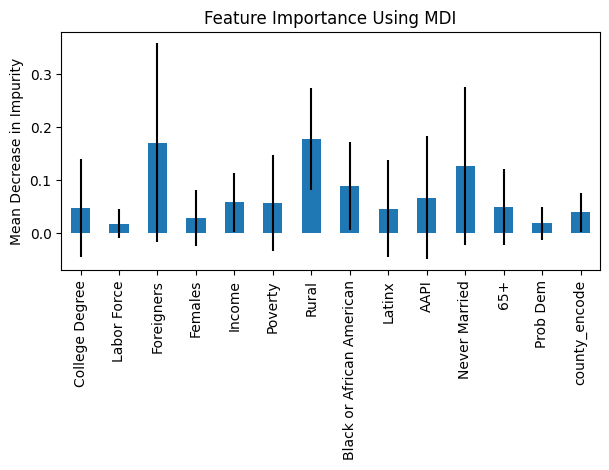

In [ ]:
importances = rf.feature_importances_
std = np.std([tree.feature_importances_ for tree in rf.estimators_], axis=0)

forest_importances = pd.Series(importances, index=df_test_scale.columns)

fig, ax = plt.subplots()
forest_importances.plot.bar(yerr=std, ax=ax)
ax.set_title("Feature Importance Using MDI")
ax.set_ylabel("Mean Decrease in Impurity")
fig.tight_layout()

**Figure 3:** Model Feature Importance

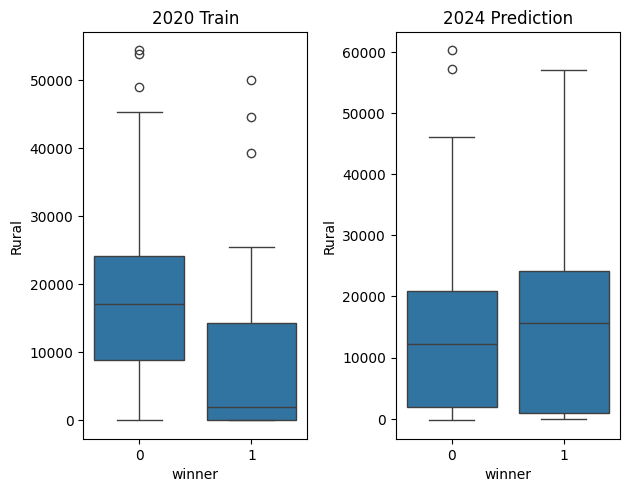

In [ ]:
# Visualize the 5 most important features from the model in the following cells:

fig, ax = plt.subplots(nrows=1, ncols=2)

sns.boxplot(x=df_train['winner'], y=ddf['Rural'], ax=ax[0])
sns.boxplot(x=df['winner'], y=df_test['Rural'], ax=ax[1])

fig.tight_layout()
ax[0].title.set_text('2020 Train')
ax[1].title.set_text('2024 Prediction')

**Figure 4:** Boxplots Comparing Number of Rural Virginia Citizens and County Winners

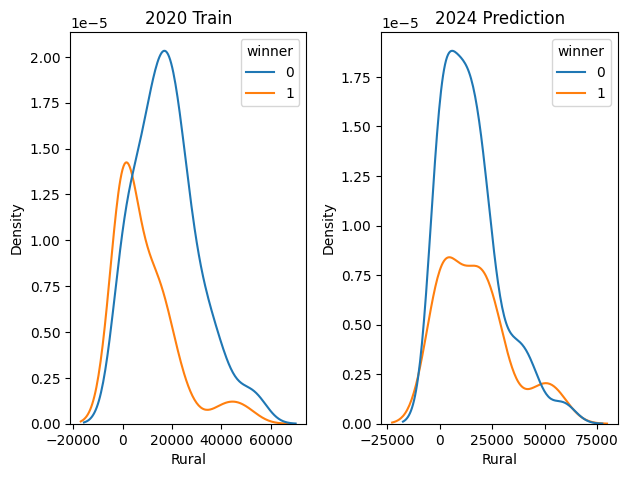

In [ ]:
fig, ax = plt.subplots(nrows=1, ncols=2)

sns.kdeplot(x=ddf['Rural'], hue=df_train['winner'], ax=ax[0])
sns.kdeplot(x=df_test['Rural'], hue=df['winner'], ax=ax[1])

fig.tight_layout()
ax[0].title.set_text('2020 Train')
ax[1].title.set_text('2024 Prediction')

**Figure 5:** Kernel Density Plots for Rural Virginia Citizens and County Winners

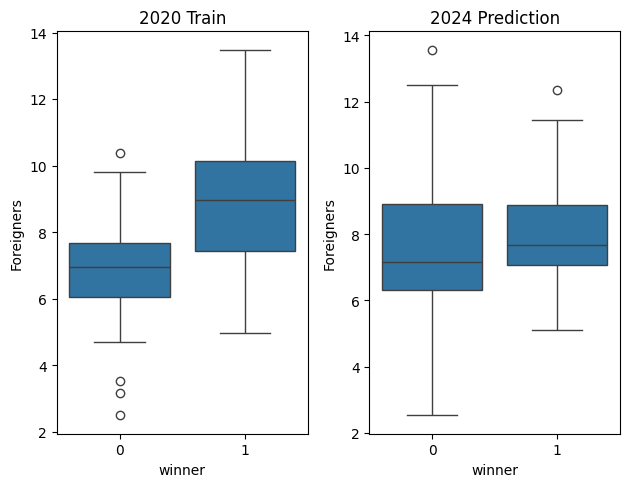

In [ ]:
fig, ax = plt.subplots(nrows=1, ncols=2)

sns.boxplot(x=df_train['winner'], y=np.arcsinh(ddf['Foreigners']), ax=ax[0]) # transform for easier visualization
sns.boxplot(x=df['winner'], y=np.arcsinh(df_test['Foreigners']), ax=ax[1])

fig.tight_layout()
ax[0].title.set_text('2020 Train')
ax[1].title.set_text('2024 Prediction')

**Figure 6:** Boxplots Comparing Number of Foreign-Born Virginia Citizens and County Winners

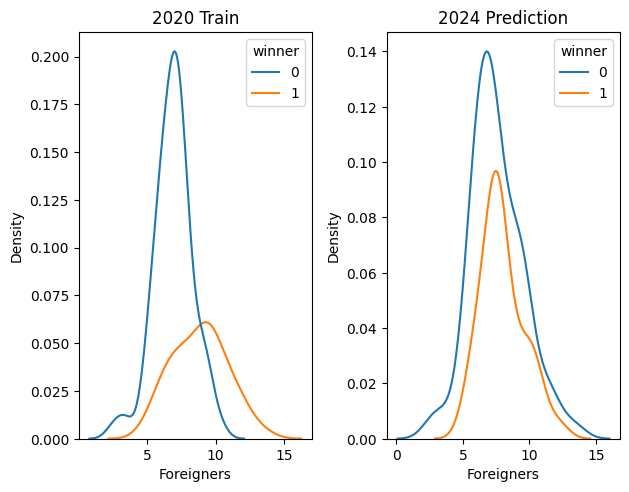

In [ ]:
fig, ax = plt.subplots(nrows=1, ncols=2)

sns.kdeplot(x=np.arcsinh(ddf['Foreigners']), hue=df_train['winner'], ax=ax[0])
sns.kdeplot(x=np.arcsinh(df_test['Foreigners']), hue=df['winner'], ax=ax[1])

fig.tight_layout()
ax[0].title.set_text('2020 Train')
ax[1].title.set_text('2024 Prediction')

**Figure 7:** Kernel Density Plots for Foreign-Born Virginia Citizens and County Winners

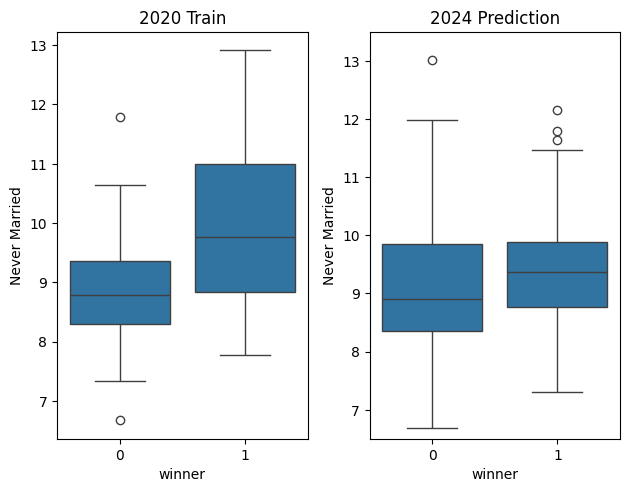

In [ ]:
fig, ax = plt.subplots(nrows=1, ncols=2)

sns.boxplot(x=df_train['winner'], y=np.arcsinh(ddf['Never Married']), ax=ax[0])
sns.boxplot(x=df['winner'], y=np.arcsinh(df_test['Never Married']), ax=ax[1])
ax[1].set_ylim(6.5, 13.5)

fig.tight_layout()
ax[0].title.set_text('2020 Train')
ax[1].title.set_text('2024 Prediction')

**Figure 8:** Boxplots Comparing Number of Never-Married Virginia Citizens and County Winners

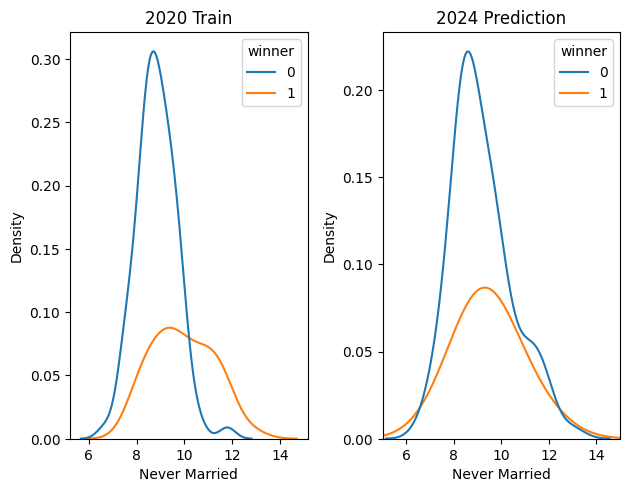

In [ ]:
fig, ax = plt.subplots(nrows=1, ncols=2)

sns.kdeplot(x=np.arcsinh(ddf['Never Married']), hue=df_train['winner'], ax=ax[0])
sns.kdeplot(x=np.arcsinh(df_test['Never Married']), hue=df['winner'], ax=ax[1])
ax[1].set_xlim(5, 15)

fig.tight_layout()
ax[0].title.set_text('2020 Train')
ax[1].title.set_text('2024 Prediction')

**Figure 9:** Kernel Density Plots for Never-Married Virginia Citizens and County Winners

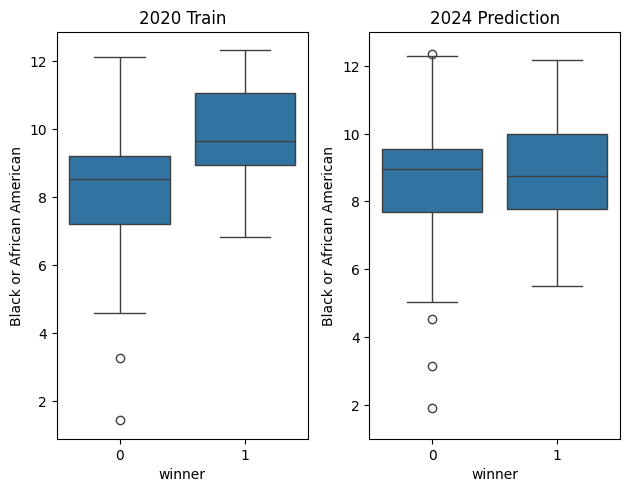

In [ ]:
fig, ax = plt.subplots(nrows=1, ncols=2)

sns.boxplot(x=df_train['winner'], y=np.arcsinh(ddf['Black or African American']), ax=ax[0])
sns.boxplot(x=df['winner'], y=np.arcsinh(df_test['Black or African American']), ax=ax[1])
ax[1].set_ylim(1, 13)

fig.tight_layout()
ax[0].title.set_text('2020 Train')
ax[1].title.set_text('2024 Prediction')

**Figure 10:** Boxplots Comparing Number of Black or African American Virginia Citizens and County Winners

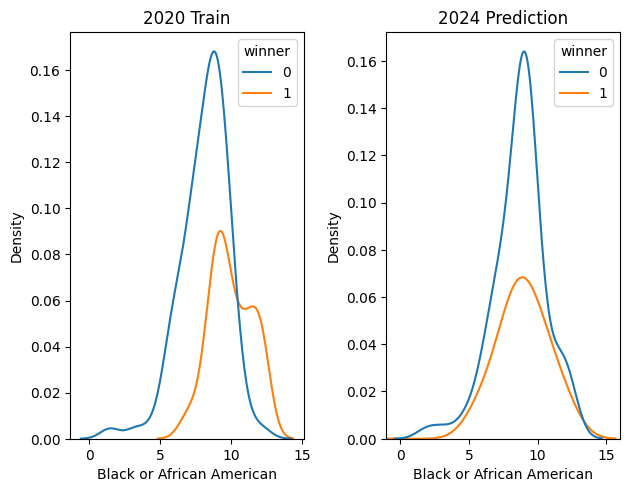

In [ ]:
fig, ax = plt.subplots(nrows=1, ncols=2)

sns.kdeplot(x=np.arcsinh(ddf['Black or African American']), hue=df_train['winner'], ax=ax[0])
sns.kdeplot(x=np.arcsinh(df_test['Black or African American']), hue=df['winner'], ax=ax[1])
ax[1].set_xlim(-1, 16)

fig.tight_layout()
ax[0].title.set_text('2020 Train')
ax[1].title.set_text('2024 Prediction')

**Figure 11:** Kernel Density Plots for Black or African American Virginia Citizens and County Winners

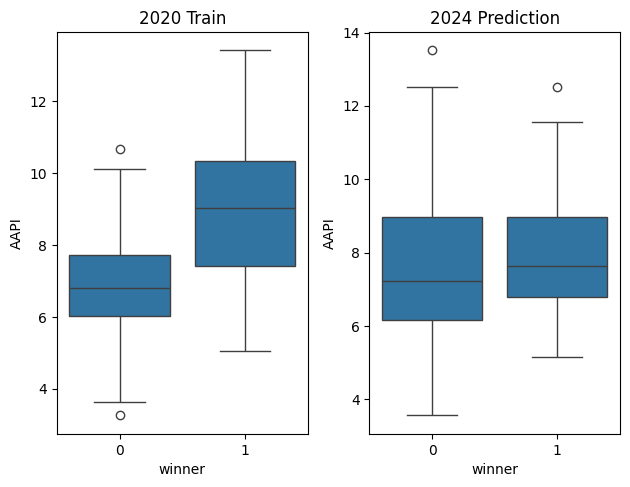

In [ ]:
fig, ax = plt.subplots(nrows=1, ncols=2)

sns.boxplot(x=df_train['winner'], y=np.arcsinh(ddf['AAPI']), ax=ax[0])
sns.boxplot(x=df['winner'], y=np.arcsinh(df_test['AAPI']), ax=ax[1])

fig.tight_layout()
ax[0].title.set_text('2020 Train')
ax[1].title.set_text('2024 Prediction')

**Figure 12:** Boxplots Comparing Number of Asian American or Pacific Islander Virginia Citizens and County Winners

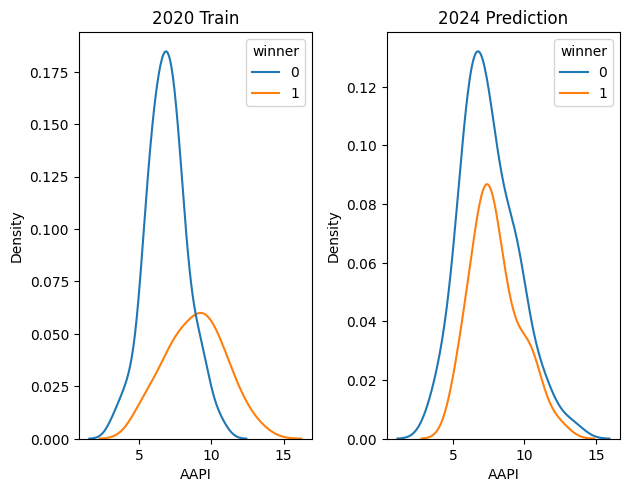

In [ ]:
fig, ax = plt.subplots(nrows=1, ncols=2)

sns.kdeplot(x=np.arcsinh(ddf['AAPI']), hue=df_train['winner'], ax=ax[0])
sns.kdeplot(x=np.arcsinh(df_test['AAPI']), hue=df['winner'], ax=ax[1])

fig.tight_layout()
ax[0].title.set_text('2020 Train')
ax[1].title.set_text('2024 Prediction')

**Figure 13:** Kernel Density Plots for Asian American or Pacific Islander Virginia Citizens and County Winners

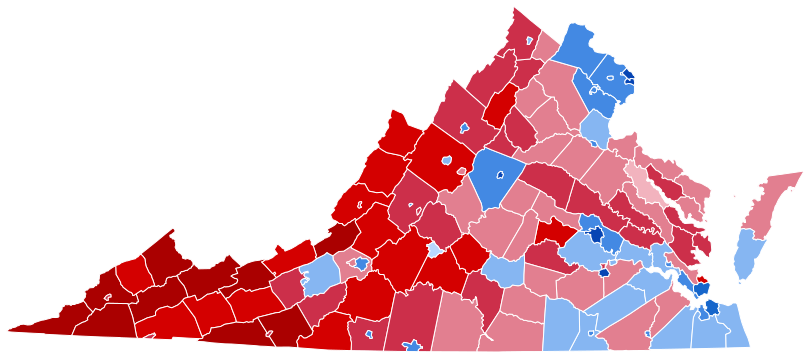

In [ ]:
display(SVG(url='https://upload.wikimedia.org/wikipedia/commons/f/f6/Virginia_Presidential_Election_Results_2020.svg'))

**Figure 14:** 2020 Electoral Map of Virginia

<Axes: >

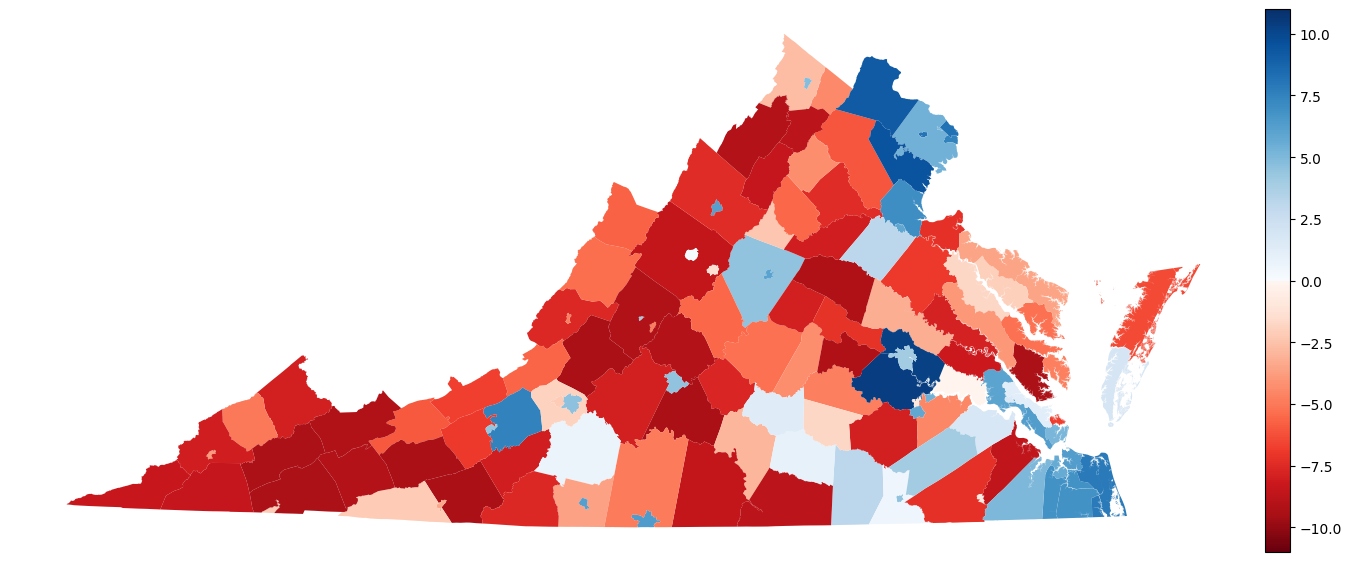

In [ ]:
top = colormaps['Blues']
bottom = colormaps['Reds_r']
newcolors = np.vstack((bottom(np.linspace(0, 1, 128)), top(np.linspace(0, 1, 128))))
newcmp = ListedColormap(newcolors, name='BlueRed')

fig = plt.figure()
ax = fig.add_axes([0, 0, 2, 2])
divider = make_axes_locatable(ax)
ax.axis('off')
cax = divider.append_axes("right", size="2%", pad=0.08)
divnorm = TwoSlopeNorm(vmin=-11, vcenter=0, vmax=11)
df.plot(ax=ax, column='Scaled Vote Differential', legend=True, cax=cax, cmap=newcmp, norm=divnorm)

**Figure 15:** Predicted 2024 Electoral Map of Virginia

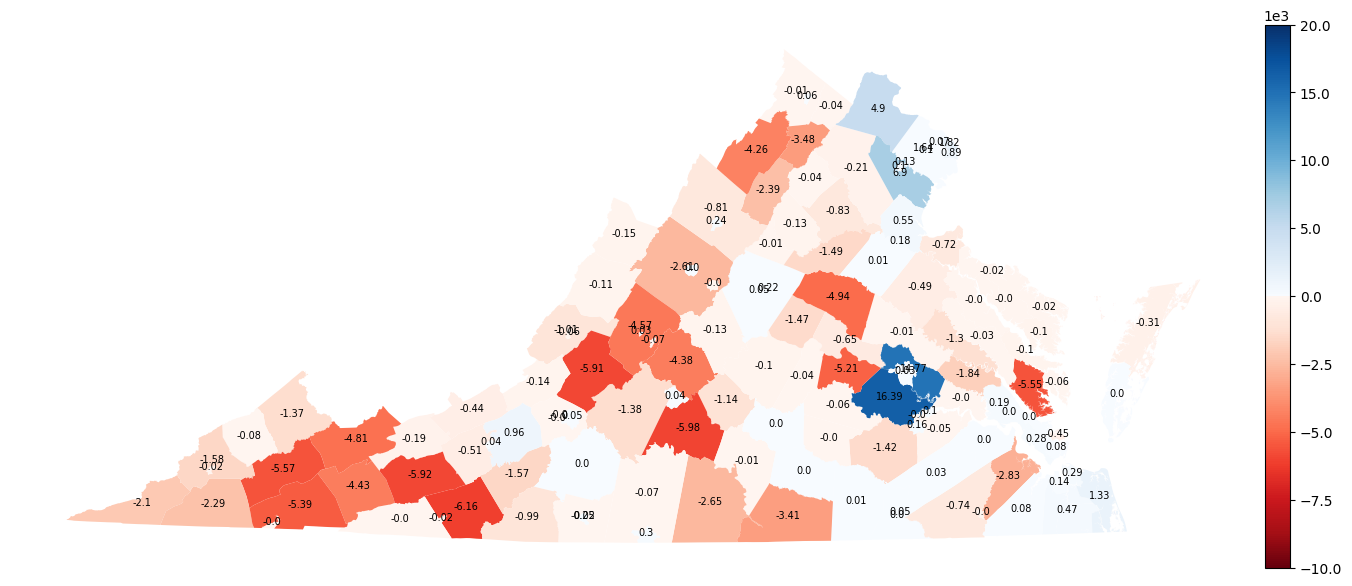

In [ ]:
fig = plt.figure()
ax = fig.add_axes([0, 0, 2, 2])
divider = make_axes_locatable(ax)
ax.axis('off')
cax = divider.append_axes("right", size="2%", pad=0.08)

divnorm = TwoSlopeNorm(vmin=-10000, vcenter=0, vmax=20000)
df.plot(ax=ax, column='Vote Differential', legend=True, cax=cax, cmap=newcmp, norm=divnorm)
sm = cm.ScalarMappable(cmap=newcmp, norm=divnorm)
cb = fig.colorbar(sm, cax=cax)
df.apply(lambda x: ax.annotate(text=round(x['Vote Differential']/1000, 2), xy=x.geometry.centroid.coords[0], ha='center', fontsize=7), axis=1);
cb.formatter.set_powerlimits((3, 3))
cb.set_ticks([-10000, -7500, -5000, -2500, 0, 5000, 10000, 15000, 20000])

**Figure 16:** Predicted 2024 Electoral Map of Virginia by Net Votes in Thousands

In [ ]:
dem = np.sum(df.loc[df['Vote Differential'] > 0, 'Vote Differential'])
rep = np.sum(df.loc[df['Vote Differential'] < 0, 'Vote Differential'])
dem_win = len(df.loc[df['Vote Differential'] > 0, 'winner'])
rep_win = len(df.loc[df['Vote Differential'] < 0, 'winner'])

pd.DataFrame([[int(dem), dem_win], [-1*int(rep), rep_win]], columns=['Total Vote Differential', 'County Wins'], index=['Democrat', 'Republican'])

,Total Vote Differential,County Wins
Democrat,53955,48
Republican,119476,85


**Figure 17:** Predicted 2024 Virginia Election Results

## Conclusion

> Upon analyzing the results of the predicted vote differentials and electoral map, it is clear that with the right predictors and data, it is possible to construct a reliable model that forecasts plausible results for the 2024 presidential election in Virginia. The results, for the most part, met expectations as they largely aligned with 2020 electoral outcomes. Since the group was able to create this reliable model while limiting the effects of outdated data, the research strategy was mostly successful in answering our question. However, it is important to note that election outcomes are inherently variable, which increases the difficulty of making accurate predictions. Regardless, our model showcased strong promise and has the potential for increased accuracy with more current census data.

> Critics may argue that the absence of validation data and extrapolating for 2024 demographics from prior censuses could hinder the accuracy and reliability of the project results. However, the most recent census is from 2020, and predicting on that data wouldn’t be an accurate way to forecast 2024 results. Moreover, validation data does not exist yet as the 2024 presidential election hasn’t occurred. While the extrapolation of old census data and the lack of validation data impacted our outcomes, we meticulously tried to address these challenges. A regression task with a random forest algorithm provided robust predictions despite the limitations of available data. Rigorous data cleaning and preparation processes were also implemented to enhance the integrity of our model. In particular, the data was imputed and scaled to account for missings and outliers. While some may argue that the raw vote differentials led to a predicted Democrat win and should have been used as the target variable, the scaled differentials were better for the model since they provided a more accurate range of potential values. Therefore, with reputable datasets from IPUMS NGHIS and no bias applied to the model results, critics should be confident in our predicted Republican win.

> One of the key strengths of our approach was the consideration of demographic variables, which are known to influence the outcome of elections. By incorporating factors such as rural population, number of foreigners, etc., our model was able to capture a holistic and nuanced understanding of the voting population. This approach helped contribute to the reliability of the predictions. If we had only relied on past outcomes (e.g. one county voted Democrat sixty percent of the time in the past five elections), we would be missing important factors that can greatly impact voter decision-making.

> There are many ways this project can be extended for future study. The inclusion of additional years of census data could enhance the accuracy of extrapolated data by having more historical context. Additionally, incorporating actual 2024 demographic information or a way to validate the accuracy of predictions would greatly improve the research project. Other machine learning methods could also be incorporated for more accurate results. With enough data, a neural network might be able to find deeper insights that our random forest model missed. Real-time data sources or sentiment analysis from social media platforms could provide further insight into voting patterns.

> Our findings highlight a multitude of factors that can affect elections and the ways in which they can be predicted. While insights were made into the possible results of the 2024 presidential election in Virginia, further research is essential to gain an even more comprehensive understanding of the best ways to forecast elections.

#### Reference
*All data for this project was derived from IPUMS NHGIS, which is available in our repository and at https://www.nhgis.org/*